In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sys
import math
from sklearn import preprocessing
import torch
from torch import nn
from data_prep import clean_data, abnormal, visualize_pca, prep_dataloader
from train_test import train_nn_reg, test_nn_reg
from models import Net, RMSLELoss
import xgboost as xgb
import csv
pd.set_option('max_columns'b, None)
pd.set_option('max_rows', None)
plt.rcParams["figure.figsize"] = (10,5)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# hyperparameters


In [2]:
test_size = 0.2
contamination = 0.2
batch_size = 16
epochs = 10000
lr = 3e-3

# Reading CSV file with PANDA

In [3]:
train_set_panda = pd.read_csv("train.csv")
test_set_panda = pd.read_csv("test.csv")

# Cleaning Data

In [4]:
# looping through each column name in the data (Training Dataset)
train_set_panda = clean_data(train_set_panda)
test_set_panda = clean_data(test_set_panda)
X_train, X_test, y_train, y_test = abnormal(train_set_panda, test_size, contamination)
inputsize = X_train.shape[1]
print(f"The input size of your data is {inputsize}")

The input size of your data is 76


# Visualization

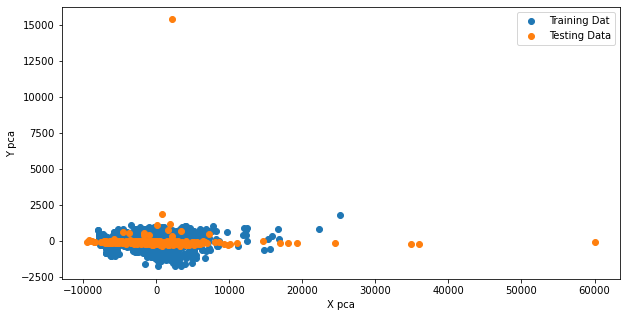

In [5]:
visualize_pca(X_train, X_test) # 

# preprocessing training dataset to dataloaders

In [6]:
train_data_loader, test_data_loader = prep_dataloader(X_train,X_test, y_train, y_test, batch_size = batch_size)

# training the model (NN fully connected layers)

epoch 0, loss 2.0933092977019796
epoch 1, loss 1.80932171088383
epoch 2, loss 1.6834127325908628
epoch 3, loss 1.592693773747973
epoch 4, loss 1.5201009301038553
epoch 5, loss 1.4588594485943969
epoch 6, loss 1.4054649460579938
epoch 7, loss 1.3578594580213244
epoch 8, loss 1.314692483313988
epoch 9, loss 1.275105559897266
epoch 10, loss 1.2384241953010529
epoch 11, loss 1.2041845373165077
epoch 12, loss 1.1719921368176114
epoch 13, loss 1.1415921334316155
epoch 14, loss 1.1127600342168729
epoch 15, loss 1.0853225851811406
epoch 16, loss 1.05912527546682
epoch 17, loss 1.0340490526247155
epoch 18, loss 1.0100102177316104
epoch 19, loss 0.9869187073535787
epoch 20, loss 0.9647048172720089
epoch 21, loss 0.943330791578619
epoch 22, loss 0.9227433146724127
epoch 23, loss 0.9029196932419015
epoch 24, loss 0.8838307527749778
epoch 25, loss 0.8654362628750113
epoch 26, loss 0.8477440934302611
epoch 27, loss 0.8307425751217196
epoch 28, loss 0.8144139974810288
epoch 29, loss 0.798761942770058

epoch 240, loss 0.569039597348888
epoch 241, loss 0.5689350844905955
epoch 242, loss 0.5688299634605476
epoch 243, loss 0.56872515317727
epoch 244, loss 0.5686087682460164
epoch 245, loss 0.5685092369178074
epoch 246, loss 0.5683992138496317
epoch 247, loss 0.5682974001765061
epoch 248, loss 0.5681834937752026
epoch 249, loss 0.5680824923799673
epoch 250, loss 0.5679756236350231
epoch 251, loss 0.5678760958586537
epoch 252, loss 0.5677633355763052
epoch 253, loss 0.5676557369174956
epoch 254, loss 0.5675556261658186
epoch 255, loss 0.5674549990422505
epoch 256, loss 0.5673507122259361
epoch 257, loss 0.5672433298272332
epoch 258, loss 0.5671319805775814
epoch 259, loss 0.5670355301514657
epoch 260, loss 0.5669360162007322
epoch 261, loss 0.5668285391997295
epoch 262, loss 0.5667161197582331
epoch 263, loss 0.5666116176067811
epoch 264, loss 0.566512442911494
epoch 265, loss 0.5664099442914995
epoch 266, loss 0.5663031584016179
epoch 267, loss 0.5661977933924047
epoch 268, loss 0.566095

epoch 480, loss 0.5469303883543328
epoch 481, loss 0.5468497245064706
epoch 482, loss 0.5467744439252523
epoch 483, loss 0.5466896086951171
epoch 484, loss 0.5466164732944079
epoch 485, loss 0.5465378883755192
epoch 486, loss 0.546459297008414
epoch 487, loss 0.5463726361814537
epoch 488, loss 0.5463088427837689
epoch 489, loss 0.5462198295372228
epoch 490, loss 0.5461420474666893
epoch 491, loss 0.546072196770987
epoch 492, loss 0.5459932187330637
epoch 493, loss 0.5459105285950702
epoch 494, loss 0.5458375738340074
epoch 495, loss 0.5457624782728504
epoch 496, loss 0.545679668469762
epoch 497, loss 0.5456021195393733
epoch 498, loss 0.5455308003984957
epoch 499, loss 0.5454532022896208
epoch 500, loss 0.5453689474191441
epoch 501, loss 0.5452972165979675
epoch 502, loss 0.5452211745841177
epoch 503, loss 0.5451395985531232
epoch 504, loss 0.5450660948539312
epoch 505, loss 0.5449890230684155
epoch 506, loss 0.5449068943265907
epoch 507, loss 0.5448349547986852
epoch 508, loss 0.54476

epoch 715, loss 0.5309462551343003
epoch 716, loss 0.5308859215577036
epoch 717, loss 0.5308185469822908
epoch 718, loss 0.5307690355807363
epoch 719, loss 0.5307059152292691
epoch 720, loss 0.5306489319122439
epoch 721, loss 0.5305918729793687
epoch 722, loss 0.5305372524302133
epoch 723, loss 0.5304769508929794
epoch 724, loss 0.5304242581144011
epoch 725, loss 0.5303653816294671
epoch 726, loss 0.5303077937865333
epoch 727, loss 0.5302537348304506
epoch 728, loss 0.5302026215975889
epoch 729, loss 0.5301319667915496
epoch 730, loss 0.5300782441535897
epoch 731, loss 0.5300263827955386
epoch 732, loss 0.5299609758297348
epoch 733, loss 0.5299084726725378
epoch 734, loss 0.5298570897099503
epoch 735, loss 0.5297922112625998
epoch 736, loss 0.5297365706956633
epoch 737, loss 0.5296853775184822
epoch 738, loss 0.5296286799613611
epoch 739, loss 0.5295711121591193
epoch 740, loss 0.5295144901294009
epoch 741, loss 0.5294624166128677
epoch 742, loss 0.5294079841405174
epoch 743, loss 0.52

epoch 950, loss 0.5193302278019217
epoch 951, loss 0.5192895385094928
epoch 952, loss 0.5192455161312063
epoch 953, loss 0.5192053883617997
epoch 954, loss 0.5191591348960617
epoch 955, loss 0.5191198129380659
epoch 956, loss 0.5190755046643609
epoch 957, loss 0.5190397363105856
epoch 958, loss 0.5189972073962538
epoch 959, loss 0.51895651413665
epoch 960, loss 0.518918167278087
epoch 961, loss 0.5188693707200884
epoch 962, loss 0.5188284410751817
epoch 963, loss 0.5187841405339285
epoch 964, loss 0.5187542631228458
epoch 965, loss 0.5187107089997486
epoch 966, loss 0.518662143702574
epoch 967, loss 0.5186259684546453
epoch 968, loss 0.5185838144629616
epoch 969, loss 0.5185427125072097
epoch 970, loss 0.5185029901679039
epoch 971, loss 0.518468255224664
epoch 972, loss 0.5184200769300993
epoch 973, loss 0.5183805715042579
epoch 974, loss 0.5183442801303751
epoch 975, loss 0.5183064196020194
epoch 976, loss 0.5182593393202197
epoch 977, loss 0.5182230964777111
epoch 978, loss 0.5181849

epoch 1180, loss 0.5110465100977459
epoch 1181, loss 0.5110018971981225
epoch 1182, loss 0.5109745017377401
epoch 1183, loss 0.5109561084357588
epoch 1184, loss 0.5109115447380734
epoch 1185, loss 0.5108858183419522
epoch 1186, loss 0.510853181312628
epoch 1187, loss 0.510823730235577
epoch 1188, loss 0.5107919854339362
epoch 1189, loss 0.5107527130730601
epoch 1190, loss 0.5107301972157433
epoch 1191, loss 0.5107075458526288
epoch 1192, loss 0.5106806195177709
epoch 1193, loss 0.5106320497145553
epoch 1194, loss 0.5106026341097796
epoch 1195, loss 0.5105801761869354
epoch 1196, loss 0.5105489455572607
epoch 1197, loss 0.5105192491126418
epoch 1198, loss 0.5104898641138735
epoch 1199, loss 0.5104574622680628
epoch 1200, loss 0.5104305831065877
epoch 1201, loss 0.5103938343263784
epoch 1202, loss 0.5103663453580853
epoch 1203, loss 0.5103327333194463
epoch 1204, loss 0.5103111922326637
epoch 1205, loss 0.5102739733099692
epoch 1206, loss 0.5102422430610981
epoch 1207, loss 0.51021908047

epoch 1410, loss 0.5046832179706422
epoch 1411, loss 0.5046596521017968
epoch 1412, loss 0.5046356249376304
epoch 1413, loss 0.504601064583529
epoch 1414, loss 0.5045679286852659
epoch 1415, loss 0.5045476940000687
epoch 1416, loss 0.5045315570779204
epoch 1417, loss 0.5045138577551037
epoch 1418, loss 0.5044865933306004
epoch 1419, loss 0.5044498759052047
epoch 1420, loss 0.5044239296060784
epoch 1421, loss 0.5044036383217199
epoch 1422, loss 0.5043807601719972
epoch 1423, loss 0.5043488181557122
epoch 1424, loss 0.5043247556502273
epoch 1425, loss 0.5043064538563083
epoch 1426, loss 0.5042845020955665
epoch 1427, loss 0.5042626700850779
epoch 1428, loss 0.5042300506526948
epoch 1429, loss 0.5042073597306496
epoch 1430, loss 0.5041883709109687
epoch 1431, loss 0.5041627655783641
epoch 1432, loss 0.5041415196967941
epoch 1433, loss 0.5041100159319322
epoch 1434, loss 0.5040847661090431
epoch 1435, loss 0.5040634137231255
epoch 1436, loss 0.5040493595156113
epoch 1437, loss 0.5040149355

epoch 1640, loss 0.4994084338510228
epoch 1641, loss 0.499391240256235
epoch 1642, loss 0.4993657472823495
epoch 1643, loss 0.4993372913360689
epoch 1644, loss 0.4993168249539058
epoch 1645, loss 0.4992963086667256
epoch 1646, loss 0.4992769795397692
epoch 1647, loss 0.4992589242153643
epoch 1648, loss 0.4992348318959233
epoch 1649, loss 0.49921522441036065
epoch 1650, loss 0.4991899258370275
epoch 1651, loss 0.4991742210940549
epoch 1652, loss 0.4991524352575722
epoch 1653, loss 0.499134564925002
epoch 1654, loss 0.49910640827081226
epoch 1655, loss 0.49907849926112197
epoch 1656, loss 0.4990607424252311
epoch 1657, loss 0.49903845135775876
epoch 1658, loss 0.4990142041491878
epoch 1659, loss 0.4989979242172685
epoch 1660, loss 0.49898674880741506
epoch 1661, loss 0.498968383582379
epoch 1662, loss 0.49894513927949674
epoch 1663, loss 0.4989172364351653
epoch 1664, loss 0.49889308635614077
epoch 1665, loss 0.49886773676701585
epoch 1666, loss 0.4988596821903371
epoch 1667, loss 0.4988

epoch 1870, loss 0.49473041770129444
epoch 1871, loss 0.49471715844813324
epoch 1872, loss 0.4946936806960733
epoch 1873, loss 0.4946746072335125
epoch 1874, loss 0.4946500064684962
epoch 1875, loss 0.4946355691441529
epoch 1876, loss 0.49461914279574454
epoch 1877, loss 0.49459436999323875
epoch 1878, loss 0.49457327123109623
epoch 1879, loss 0.4945524989199829
epoch 1880, loss 0.49453047858215926
epoch 1881, loss 0.49451166414926456
epoch 1882, loss 0.49449046787987516
epoch 1883, loss 0.49447443613249376
epoch 1884, loss 0.4944565484344545
epoch 1885, loss 0.49443565603220796
epoch 1886, loss 0.49442355610213934
epoch 1887, loss 0.49440710993878284
epoch 1888, loss 0.4943805200937679
epoch 1889, loss 0.49436071343352816
epoch 1890, loss 0.4943364797201573
epoch 1891, loss 0.494318897675116
epoch 1892, loss 0.49430223496492814
epoch 1893, loss 0.49428087616851146
epoch 1894, loss 0.4942590029031043
epoch 1895, loss 0.4942379452692351
epoch 1896, loss 0.4942169414188667
epoch 1897, lo

epoch 2100, loss 0.49037702479922807
epoch 2101, loss 0.49034820637407756
epoch 2102, loss 0.49033451313349
epoch 2103, loss 0.4903235291629497
epoch 2104, loss 0.4903047655233612
epoch 2105, loss 0.4902912145323064
epoch 2106, loss 0.4902792155412161
epoch 2107, loss 0.4902463318139865
epoch 2108, loss 0.4902296970857004
epoch 2109, loss 0.49020974950475404
epoch 2110, loss 0.4901929942593538
epoch 2111, loss 0.49017846662373304
epoch 2112, loss 0.4901608789318897
epoch 2113, loss 0.4901408182792978
epoch 2114, loss 0.4901244749803052
epoch 2115, loss 0.49010516804285736
epoch 2116, loss 0.4900845792017761
epoch 2117, loss 0.49006205532531094
epoch 2118, loss 0.49004846927675233
epoch 2119, loss 0.49002888875853934
epoch 2120, loss 0.49000492814703794
epoch 2121, loss 0.4899851234729192
epoch 2122, loss 0.48997636644158316
epoch 2123, loss 0.48995390769587854
epoch 2124, loss 0.4899412143210852
epoch 2125, loss 0.48992307501878285
epoch 2126, loss 0.4899073946455808
epoch 2127, loss 0

epoch 2330, loss 0.4862209378777659
epoch 2331, loss 0.486209815525487
epoch 2332, loss 0.48618850485110043
epoch 2333, loss 0.48617121204928465
epoch 2334, loss 0.4861515488795368
epoch 2335, loss 0.486134873264967
epoch 2336, loss 0.4861140043026581
epoch 2337, loss 0.48609172509397874
epoch 2338, loss 0.48607925508731786
epoch 2339, loss 0.48605715770959235
epoch 2340, loss 0.48604218844192587
epoch 2341, loss 0.4860181975765786
epoch 2342, loss 0.48600940102763807
epoch 2343, loss 0.4859851359659247
epoch 2344, loss 0.48597095911100374
epoch 2345, loss 0.4859630732870679
epoch 2346, loss 0.485939496906445
epoch 2347, loss 0.4859121024731495
epoch 2348, loss 0.48589969646796494
epoch 2349, loss 0.4858813815940118
epoch 2350, loss 0.48586516532414853
epoch 2351, loss 0.4858485230266076
epoch 2352, loss 0.48582953352856717
epoch 2353, loss 0.4858123186672648
epoch 2354, loss 0.48580029119239865
epoch 2355, loss 0.4857792706000061
epoch 2356, loss 0.4857536892585572
epoch 2357, loss 0.

epoch 2560, loss 0.48219303102747746
epoch 2561, loss 0.48216430750126954
epoch 2562, loss 0.4821453227141408
epoch 2563, loss 0.4821283951211818
epoch 2564, loss 0.4821222107925191
epoch 2565, loss 0.48211038252896576
epoch 2566, loss 0.4820956851967961
epoch 2567, loss 0.4820769366075355
epoch 2568, loss 0.4820559928266796
epoch 2569, loss 0.4820294059519252
epoch 2570, loss 0.48200587190722394
epoch 2571, loss 0.4819937502338434
epoch 2572, loss 0.48197795416205597
epoch 2573, loss 0.48196399795821415
epoch 2574, loss 0.4819462771419864
epoch 2575, loss 0.4819296651192085
epoch 2576, loss 0.48191057701515444
epoch 2577, loss 0.4818961233231279
epoch 2578, loss 0.4818866427738632
epoch 2579, loss 0.4818669918822762
epoch 2580, loss 0.48184529913054547
epoch 2581, loss 0.48182256516682903
epoch 2582, loss 0.4817993926808264
epoch 2583, loss 0.4817903196407617
epoch 2584, loss 0.4817753603890446
epoch 2585, loss 0.4817669867587572
epoch 2586, loss 0.48174592543651784
epoch 2587, loss 0

epoch 2790, loss 0.4782582356427076
epoch 2791, loss 0.47824558144973317
epoch 2792, loss 0.47823240065488787
epoch 2793, loss 0.4782134184784821
epoch 2794, loss 0.4781904144033172
epoch 2795, loss 0.4781657977186389
epoch 2796, loss 0.4781570870055894
epoch 2797, loss 0.4781371919795959
epoch 2798, loss 0.4781184719929362
epoch 2799, loss 0.4781050409981528
epoch 2800, loss 0.478089350732835
epoch 2801, loss 0.4780689327805367
epoch 2802, loss 0.4780525476537757
epoch 2803, loss 0.47803616962622114
epoch 2804, loss 0.4780210508879177
epoch 2805, loss 0.478006290167584
epoch 2806, loss 0.47798795473895944
epoch 2807, loss 0.47797121676849535
epoch 2808, loss 0.4779487265590547
epoch 2809, loss 0.4779327455365868
epoch 2810, loss 0.47792047167243346
epoch 2811, loss 0.4779107024532259
epoch 2812, loss 0.4778908864853695
epoch 2813, loss 0.47787422677004615
epoch 2814, loss 0.4778539161676013
epoch 2815, loss 0.47782968094660955
epoch 2816, loss 0.4778160861685949
epoch 2817, loss 0.477

epoch 3020, loss 0.474423582008123
epoch 3021, loss 0.4743990155563987
epoch 3022, loss 0.47438223773633464
epoch 3023, loss 0.47437112611016996
epoch 3024, loss 0.47435084840527625
epoch 3025, loss 0.47434468753402165
epoch 3026, loss 0.4743224896842201
epoch 3027, loss 0.4743047890171784
epoch 3028, loss 0.4742826864837766
epoch 3029, loss 0.4742647641284798
epoch 3030, loss 0.4742499759646595
epoch 3031, loss 0.4742354576174188
epoch 3032, loss 0.4742273201933756
epoch 3033, loss 0.47421324160608425
epoch 3034, loss 0.47419036490769206
epoch 3035, loss 0.4741654358924624
epoch 3036, loss 0.4741432315150262
epoch 3037, loss 0.4741375729238399
epoch 3038, loss 0.47412599318923876
epoch 3039, loss 0.47410802762088805
epoch 3040, loss 0.47408584372863344
epoch 3041, loss 0.47407401713366326
epoch 3042, loss 0.4740593098601862
epoch 3043, loss 0.4740437920359011
epoch 3044, loss 0.4740296621772348
epoch 3045, loss 0.47401429203785633
epoch 3046, loss 0.47398861604011233
epoch 3047, loss 

epoch 3250, loss 0.4706709196331866
epoch 3251, loss 0.47066308520678446
epoch 3252, loss 0.4706546914937398
epoch 3253, loss 0.47063523678981833
epoch 3254, loss 0.4706203402113524
epoch 3255, loss 0.4706026417108648
epoch 3256, loss 0.4705850107054005
epoch 3257, loss 0.4705699319323114
epoch 3258, loss 0.47055440343076144
epoch 3259, loss 0.4705304256170405
epoch 3260, loss 0.47051557322502896
epoch 3261, loss 0.47050042673765413
epoch 3262, loss 0.4704840998488278
epoch 3263, loss 0.47046464211684763
epoch 3264, loss 0.4704549250281177
epoch 3265, loss 0.4704455293162334
epoch 3266, loss 0.4704278057167166
epoch 3267, loss 0.4704066954923897
epoch 3268, loss 0.4703845346299804
epoch 3269, loss 0.4703700980580763
epoch 3270, loss 0.47036304740327833
epoch 3271, loss 0.4703422282663688
epoch 3272, loss 0.47032861091827216
epoch 3273, loss 0.4703101533828758
epoch 3274, loss 0.4703001036385832
epoch 3275, loss 0.4702815697981367
epoch 3276, loss 0.4702627487027072
epoch 3277, loss 0.4

epoch 3480, loss 0.46705225919214927
epoch 3481, loss 0.4670371258458162
epoch 3482, loss 0.4670201760239009
epoch 3483, loss 0.4670034535399943
epoch 3484, loss 0.46698139375250225
epoch 3485, loss 0.46696647823839754
epoch 3486, loss 0.4669598813598693
epoch 3487, loss 0.4669450284417708
epoch 3488, loss 0.4669330796696786
epoch 3489, loss 0.46692297535986166
epoch 3490, loss 0.46689572635862936
epoch 3491, loss 0.46687489731267984
epoch 3492, loss 0.46686021480449896
epoch 3493, loss 0.46684644152019467
epoch 3494, loss 0.4668345253903784
epoch 3495, loss 0.46682157424758564
epoch 3496, loss 0.46680669636921546
epoch 3497, loss 0.4667865123590034
epoch 3498, loss 0.46677288975540154
epoch 3499, loss 0.46675940933326343
epoch 3500, loss 0.4667374965601635
epoch 3501, loss 0.46672651787184544
epoch 3502, loss 0.4667134958175484
epoch 3503, loss 0.4666928058378096
epoch 3504, loss 0.4666775780328524
epoch 3505, loss 0.4666704063753008
epoch 3506, loss 0.466658418369291
epoch 3507, loss

epoch 3710, loss 0.4635495600963339
epoch 3711, loss 0.46353798856155615
epoch 3712, loss 0.46353022727685533
epoch 3713, loss 0.46351695904483664
epoch 3714, loss 0.4634993987995407
epoch 3715, loss 0.46347951650984254
epoch 3716, loss 0.4634622357658045
epoch 3717, loss 0.46344288758669955
epoch 3718, loss 0.46343059564560074
epoch 3719, loss 0.46342130140283144
epoch 3720, loss 0.46340373508011173
epoch 3721, loss 0.4633903258784787
epoch 3722, loss 0.46337901307868
epoch 3723, loss 0.46335972737760533
epoch 3724, loss 0.46334512889316004
epoch 3725, loss 0.46332842203739544
epoch 3726, loss 0.4633143240775238
epoch 3727, loss 0.4633023566239459
epoch 3728, loss 0.4632852540791854
epoch 3729, loss 0.4632732757890407
epoch 3730, loss 0.4632535110967315
epoch 3731, loss 0.46323964938571144
epoch 3732, loss 0.4632269665790091
epoch 3733, loss 0.46321371419617413
epoch 3734, loss 0.463192498471599
epoch 3735, loss 0.463179862903604
epoch 3736, loss 0.46316269203574045
epoch 3737, loss 0

epoch 3940, loss 0.46020680959607596
epoch 3941, loss 0.4601937377887993
epoch 3942, loss 0.46018177425029794
epoch 3943, loss 0.460171734922913
epoch 3944, loss 0.4601405626010348
epoch 3945, loss 0.4601264707088729
epoch 3946, loss 0.4601129723095132
epoch 3947, loss 0.4600950842550013
epoch 3948, loss 0.4600784155576843
epoch 3949, loss 0.4600649484121185
epoch 3950, loss 0.46005368998871526
epoch 3951, loss 0.4600427351596964
epoch 3952, loss 0.4600346206388518
epoch 3953, loss 0.4600272040485799
epoch 3954, loss 0.4600078486498257
epoch 3955, loss 0.45999108894198826
epoch 3956, loss 0.4599791920613586
epoch 3957, loss 0.4599547623409908
epoch 3958, loss 0.45993953851220243
epoch 3959, loss 0.4599167373814464
epoch 3960, loss 0.45990543935982414
epoch 3961, loss 0.4598993903134688
epoch 3962, loss 0.4598870470466014
epoch 3963, loss 0.4598792027272407
epoch 3964, loss 0.4598623334313575
epoch 3965, loss 0.4598422274276011
epoch 3966, loss 0.4598295014459045
epoch 3967, loss 0.4598

epoch 4170, loss 0.45700372206571743
epoch 4171, loss 0.45699130721924175
epoch 4172, loss 0.45698115303446624
epoch 4173, loss 0.4569717864790838
epoch 4174, loss 0.45696707950181414
epoch 4175, loss 0.45695519729813316
epoch 4176, loss 0.45693701925269864
epoch 4177, loss 0.45692478057721475
epoch 4178, loss 0.45691794862049107
epoch 4179, loss 0.45690249508714975
epoch 4180, loss 0.45687302872490926
epoch 4181, loss 0.45685620515305136
epoch 4182, loss 0.4568351939594718
epoch 4183, loss 0.4568305651862535
epoch 4184, loss 0.4568194808183481
epoch 4185, loss 0.45681545203262136
epoch 4186, loss 0.4568035280119071
epoch 4187, loss 0.456794353817773
epoch 4188, loss 0.4567773230437496
epoch 4189, loss 0.4567583950389306
epoch 4190, loss 0.45674352445973027
epoch 4191, loss 0.4567348486717425
epoch 4192, loss 0.4567247861106308
epoch 4193, loss 0.4567022638499639
epoch 4194, loss 0.4566801787623571
epoch 4195, loss 0.4566651206384834
epoch 4196, loss 0.45665408977411037
epoch 4197, los

epoch 4400, loss 0.45400876222735476
epoch 4401, loss 0.45399681789577134
epoch 4402, loss 0.45397829079297236
epoch 4403, loss 0.4539621405040377
epoch 4404, loss 0.45394817672678933
epoch 4405, loss 0.4539407894959747
epoch 4406, loss 0.45393380218608437
epoch 4407, loss 0.4539289401878835
epoch 4408, loss 0.45391629936088373
epoch 4409, loss 0.453910039464539
epoch 4410, loss 0.45388404109466857
epoch 4411, loss 0.4538637907307002
epoch 4412, loss 0.453846346141395
epoch 4413, loss 0.45383444956864
epoch 4414, loss 0.45382362593466724
epoch 4415, loss 0.4538116430599282
epoch 4416, loss 0.45379923577772147
epoch 4417, loss 0.45378807513937713
epoch 4418, loss 0.45378297141984975
epoch 4419, loss 0.45376971483850426
epoch 4420, loss 0.45375753990415774
epoch 4421, loss 0.45374446403710744
epoch 4422, loss 0.4537342769897977
epoch 4423, loss 0.45371460916013834
epoch 4424, loss 0.45369826160748034
epoch 4425, loss 0.4536873910245087
epoch 4426, loss 0.45367132919532593
epoch 4427, los

epoch 4630, loss 0.45119269483445135
epoch 4631, loss 0.45118354117808196
epoch 4632, loss 0.4511720309018277
epoch 4633, loss 0.45116642735885837
epoch 4634, loss 0.4511596173650507
epoch 4635, loss 0.4511507071180425
epoch 4636, loss 0.4511227052980846
epoch 4637, loss 0.45110030617384755
epoch 4638, loss 0.4510929736454061
epoch 4639, loss 0.4510803600067088
epoch 4640, loss 0.45107324580034935
epoch 4641, loss 0.45106674627621757
epoch 4642, loss 0.4510563360920593
epoch 4643, loss 0.45104471141976943
epoch 4644, loss 0.4510317178950643
epoch 4645, loss 0.4510173909585559
epoch 4646, loss 0.45100970120697864
epoch 4647, loss 0.4510012872410471
epoch 4648, loss 0.450989212295659
epoch 4649, loss 0.45098399485824814
epoch 4650, loss 0.4509765559924088
epoch 4651, loss 0.45094362453043524
epoch 4652, loss 0.45092610617792783
epoch 4653, loss 0.45091469407093165
epoch 4654, loss 0.4509040652888411
epoch 4655, loss 0.450892596330129
epoch 4656, loss 0.4508895494494608
epoch 4657, loss 0

epoch 4860, loss 0.4485654070220704
epoch 4861, loss 0.4485609758440246
epoch 4862, loss 0.4485569294702062
epoch 4863, loss 0.44855596692729044
epoch 4864, loss 0.4485460925084398
epoch 4865, loss 0.4485351882781006
epoch 4866, loss 0.44852534972138364
epoch 4867, loss 0.4485155940070688
epoch 4868, loss 0.4485080846372426
epoch 4869, loss 0.4484999219157754
epoch 4870, loss 0.4484880831575445
epoch 4871, loss 0.44848019573451425
epoch 4872, loss 0.4484659528573446
epoch 4873, loss 0.4484537237606542
epoch 4874, loss 0.4484266917936227
epoch 4875, loss 0.4484173740972662
epoch 4876, loss 0.4484036341759826
epoch 4877, loss 0.4483977662291245
epoch 4878, loss 0.4483813893058238
epoch 4879, loss 0.4483729707993788
epoch 4880, loss 0.4483693280163714
epoch 4881, loss 0.44836153877165175
epoch 4882, loss 0.44834467381581106
epoch 4883, loss 0.4483326168903137
epoch 4884, loss 0.4483225237612215
epoch 4885, loss 0.44831725810701406
epoch 4886, loss 0.44830913444513915
epoch 4887, loss 0.44

epoch 5090, loss 0.4461937351124214
epoch 5091, loss 0.44618531212297946
epoch 5092, loss 0.446178452424335
epoch 5093, loss 0.4461690676808329
epoch 5094, loss 0.4461602802369222
epoch 5095, loss 0.44613968268676535
epoch 5096, loss 0.4461168366380006
epoch 5097, loss 0.4461003074740384
epoch 5098, loss 0.44609857446929396
epoch 5099, loss 0.44609331596743146
epoch 5100, loss 0.4460824800196826
epoch 5101, loss 0.4460774192095681
epoch 5102, loss 0.4460676561028696
epoch 5103, loss 0.446060628696636
epoch 5104, loss 0.4460453230456582
epoch 5105, loss 0.4460341357131049
epoch 5106, loss 0.4460231904563772
epoch 5107, loss 0.4460152325461881
epoch 5108, loss 0.4460012379787534
epoch 5109, loss 0.44599841534187423
epoch 5110, loss 0.44599122913183964
epoch 5111, loss 0.44597779219401745
epoch 5112, loss 0.44596593348755137
epoch 5113, loss 0.4459509771363304
epoch 5114, loss 0.44594211658260546
epoch 5115, loss 0.4459348918020286
epoch 5116, loss 0.44592859915583133
epoch 5117, loss 0.4

epoch 5320, loss 0.44398892416345787
epoch 5321, loss 0.4439838309568507
epoch 5322, loss 0.44397997951298024
epoch 5323, loss 0.44397318813660336
epoch 5324, loss 0.4439667943008407
epoch 5325, loss 0.4439578125112583
epoch 5326, loss 0.44394734059092944
epoch 5327, loss 0.4439364460044764
epoch 5328, loss 0.44392661419294116
epoch 5329, loss 0.4439184977991792
epoch 5330, loss 0.44390662362210626
epoch 5331, loss 0.44389024856509335
epoch 5332, loss 0.4438738273843748
epoch 5333, loss 0.4438645720128029
epoch 5334, loss 0.4438594751032233
epoch 5335, loss 0.4438567626073583
epoch 5336, loss 0.4438452589256193
epoch 5337, loss 0.44384223081271557
epoch 5338, loss 0.4438296282011625
epoch 5339, loss 0.44381751320726315
epoch 5340, loss 0.44380888350160297
epoch 5341, loss 0.44379545390153613
epoch 5342, loss 0.44379498838106535
epoch 5343, loss 0.4437917189111892
epoch 5344, loss 0.44378917900874143
epoch 5345, loss 0.44378032480538876
epoch 5346, loss 0.443770450549716
epoch 5347, los

epoch 5550, loss 0.4420068601826244
epoch 5551, loss 0.4419925364187931
epoch 5552, loss 0.4419872647797189
epoch 5553, loss 0.4419756995815835
epoch 5554, loss 0.44196931970728853
epoch 5555, loss 0.4419596310024591
epoch 5556, loss 0.4419584923678287
epoch 5557, loss 0.4419503635456883
epoch 5558, loss 0.4419351292805879
epoch 5559, loss 0.44192633880068594
epoch 5560, loss 0.4419172749621626
epoch 5561, loss 0.4419097729156671
epoch 5562, loss 0.44190950458505374
epoch 5563, loss 0.44189990258544604
epoch 5564, loss 0.4418985831907846
epoch 5565, loss 0.44189667281921335
epoch 5566, loss 0.4418899605910542
epoch 5567, loss 0.4418828161626226
epoch 5568, loss 0.44187971344426796
epoch 5569, loss 0.4418522229852864
epoch 5570, loss 0.44183691645636414
epoch 5571, loss 0.4418225854680947
epoch 5572, loss 0.4418116364867546
epoch 5573, loss 0.44180589650199675
epoch 5574, loss 0.44179914173464596
epoch 5575, loss 0.4417994844489666
epoch 5576, loss 0.44179511918046577
epoch 5577, loss 0

epoch 5780, loss 0.4402198499504422
epoch 5781, loss 0.440213058224306
epoch 5782, loss 0.44020259619075625
epoch 5783, loss 0.4401937739816765
epoch 5784, loss 0.44018953163901425
epoch 5785, loss 0.4401873306996641
epoch 5786, loss 0.44018439992184005
epoch 5787, loss 0.4401773744099153
epoch 5788, loss 0.4401555524071953
epoch 5789, loss 0.4401447191825448
epoch 5790, loss 0.440136629738045
epoch 5791, loss 0.44012891486028427
epoch 5792, loss 0.4401239385216674
epoch 5793, loss 0.4401208526699596
epoch 5794, loss 0.4401200903134898
epoch 5795, loss 0.44011257570916634
epoch 5796, loss 0.44010921145469334
epoch 5797, loss 0.4401017018294649
epoch 5798, loss 0.44008638262305405
epoch 5799, loss 0.44006725065654445
epoch 5800, loss 0.4400573986879069
epoch 5801, loss 0.44005317913579883
epoch 5802, loss 0.4400482527345611
epoch 5803, loss 0.4400456533448022
epoch 5804, loss 0.4400433185298709
epoch 5805, loss 0.4400380594114302
epoch 5806, loss 0.4400298876509253
epoch 5807, loss 0.44

epoch 6010, loss 0.4386069839772907
epoch 6011, loss 0.4386029806608405
epoch 6012, loss 0.438591545188902
epoch 6013, loss 0.4385860001697149
epoch 6014, loss 0.4385833880824877
epoch 6015, loss 0.4385733829995352
epoch 6016, loss 0.4385696432719642
epoch 6017, loss 0.4385653413076872
epoch 6018, loss 0.43856035932088927
epoch 6019, loss 0.4385553745419926
epoch 6020, loss 0.43855108352384303
epoch 6021, loss 0.4385481875955689
epoch 6022, loss 0.43854569751964867
epoch 6023, loss 0.43853238779170134
epoch 6024, loss 0.4385268737008002
epoch 6025, loss 0.43852255259894474
epoch 6026, loss 0.4385140551188763
epoch 6027, loss 0.4384893728182546
epoch 6028, loss 0.43848212747886134
epoch 6029, loss 0.43847450488280465
epoch 6030, loss 0.438469248547912
epoch 6031, loss 0.43846742446891174
epoch 6032, loss 0.43846475479386027
epoch 6033, loss 0.4384631716151637
epoch 6034, loss 0.4384594128028956
epoch 6035, loss 0.43845356974574484
epoch 6036, loss 0.43844422659676074
epoch 6037, loss 0.

epoch 6240, loss 0.4372032042922373
epoch 6241, loss 0.43718290643213703
epoch 6242, loss 0.43717689076518135
epoch 6243, loss 0.43716104934394673
epoch 6244, loss 0.4371531131078748
epoch 6245, loss 0.43714325367174295
epoch 6246, loss 0.43714343089830143
epoch 6247, loss 0.43713980026719335
epoch 6248, loss 0.43713238103884094
epoch 6249, loss 0.43712349787651866
epoch 6250, loss 0.4371188026509704
epoch 6251, loss 0.4371121883713478
epoch 6252, loss 0.43710993698004713
epoch 6253, loss 0.43710995763639116
epoch 6254, loss 0.4371030130052073
epoch 6255, loss 0.43709415380341277
epoch 6256, loss 0.43708538384161083
epoch 6257, loss 0.43707808445854573
epoch 6258, loss 0.4370699852062243
epoch 6259, loss 0.43706780019538705
epoch 6260, loss 0.4370656803271604
epoch 6261, loss 0.43706247377939783
epoch 6262, loss 0.4370607346984661
epoch 6263, loss 0.4370523570219058
epoch 6264, loss 0.43705025585983326
epoch 6265, loss 0.4370424755200735
epoch 6266, loss 0.4370282751110776
epoch 6267, 

epoch 6470, loss 0.4359150504870466
epoch 6471, loss 0.435912672979745
epoch 6472, loss 0.43590011096841186
epoch 6473, loss 0.4358988934950871
epoch 6474, loss 0.4358940597810069
epoch 6475, loss 0.43589123687877984
epoch 6476, loss 0.4358832631821239
epoch 6477, loss 0.43587810901337154
epoch 6478, loss 0.4358685484128985
epoch 6479, loss 0.43585925864419073
epoch 6480, loss 0.43585284472329666
epoch 6481, loss 0.43584799412841274
epoch 6482, loss 0.4358452876923338
epoch 6483, loss 0.4358372370973574
epoch 6484, loss 0.43583081053810024
epoch 6485, loss 0.4358328373193857
epoch 6486, loss 0.4358264435819591
epoch 6487, loss 0.4358250161226853
epoch 6488, loss 0.43582116429181395
epoch 6489, loss 0.43581647459432526
epoch 6490, loss 0.43581583060813756
epoch 6491, loss 0.4358151816951087
epoch 6492, loss 0.435810188987668
epoch 6493, loss 0.43580385243646835
epoch 6494, loss 0.43580005851708226
epoch 6495, loss 0.43579462924015605
epoch 6496, loss 0.435790472587664
epoch 6497, loss 0

epoch 6700, loss 0.43479668557141526
epoch 6701, loss 0.4347964320198763
epoch 6702, loss 0.43478849067017605
epoch 6703, loss 0.4347835841984714
epoch 6704, loss 0.434775706077643
epoch 6705, loss 0.43476692028260217
epoch 6706, loss 0.4347628505274997
epoch 6707, loss 0.4347601168587392
epoch 6708, loss 0.43475533874264743
epoch 6709, loss 0.43475620142159543
epoch 6710, loss 0.4347495786466269
epoch 6711, loss 0.4347474208965483
epoch 6712, loss 0.43473256122066384
epoch 6713, loss 0.43472141522264596
epoch 6714, loss 0.43471607661524236
epoch 6715, loss 0.43470741728831547
epoch 6716, loss 0.4347005728440212
epoch 6717, loss 0.4346988157441147
epoch 6718, loss 0.434699918199131
epoch 6719, loss 0.43469964730629324
epoch 6720, loss 0.4346940677477932
epoch 6721, loss 0.4346873603593003
epoch 6722, loss 0.4346783107332006
epoch 6723, loss 0.43467774945582427
epoch 6724, loss 0.4346753240726593
epoch 6725, loss 0.43467069885545373
epoch 6726, loss 0.4346672900122879
epoch 6727, loss 0

epoch 6930, loss 0.43380019529722025
epoch 6931, loss 0.4337957077583421
epoch 6932, loss 0.43378814734897153
epoch 6933, loss 0.43378430246739347
epoch 6934, loss 0.43377968070433137
epoch 6935, loss 0.43377450910967674
epoch 6936, loss 0.43377263239173935
epoch 6937, loss 0.43376907485868277
epoch 6938, loss 0.43376811181607444
epoch 6939, loss 0.43375900516432875
epoch 6940, loss 0.4337626348344888
epoch 6941, loss 0.4337482421803793
epoch 6942, loss 0.43374240451311824
epoch 6943, loss 0.43373760572351144
epoch 6944, loss 0.43373367028336474
epoch 6945, loss 0.4337265530931502
epoch 6946, loss 0.43372671337315166
epoch 6947, loss 0.43371756014012075
epoch 6948, loss 0.4337138835068122
epoch 6949, loss 0.433706137798989
epoch 6950, loss 0.43370651733534415
epoch 6951, loss 0.4337043513385962
epoch 6952, loss 0.43370058986256427
epoch 6953, loss 0.43369582569677384
epoch 6954, loss 0.43369599719833285
epoch 6955, loss 0.4336929156922412
epoch 6956, loss 0.43368919997766214
epoch 6957

epoch 7155, loss 0.4329395595640372
epoch 7156, loss 0.4329362100115372
epoch 7157, loss 0.4329332756498272
epoch 7158, loss 0.43292927281002885
epoch 7159, loss 0.43292784965344777
epoch 7160, loss 0.43292693666059734
epoch 7161, loss 0.43291368623403303
epoch 7162, loss 0.4329071927920958
epoch 7163, loss 0.43290112646036744
epoch 7164, loss 0.4328971675175727
epoch 7165, loss 0.43289798314180294
epoch 7166, loss 0.43289465981349207
epoch 7167, loss 0.43289156180968014
epoch 7168, loss 0.4328891363372671
epoch 7169, loss 0.43288615673177183
epoch 7170, loss 0.43287893458937216
epoch 7171, loss 0.4328762443054212
epoch 7172, loss 0.4328705836273335
epoch 7173, loss 0.43286680265338634
epoch 7174, loss 0.4328653003776902
epoch 7175, loss 0.4328619220981226
epoch 7176, loss 0.43285795127311955
epoch 7177, loss 0.43285645130061423
epoch 7178, loss 0.4328507385793606
epoch 7179, loss 0.432852881715656
epoch 7180, loss 0.43284430618933695
epoch 7181, loss 0.43284546719495964
epoch 7182, lo

epoch 7385, loss 0.43216321531920665
epoch 7386, loss 0.43216261366500175
epoch 7387, loss 0.4321607769927464
epoch 7388, loss 0.4321580886667242
epoch 7389, loss 0.4321568032318826
epoch 7390, loss 0.43215454428785155
epoch 7391, loss 0.43215283396379317
epoch 7392, loss 0.4321527644169003
epoch 7393, loss 0.4321502545847752
epoch 7394, loss 0.43214777016097367
epoch 7395, loss 0.4321423366395234
epoch 7396, loss 0.4321402907960865
epoch 7397, loss 0.43213600884159953
epoch 7398, loss 0.4321314549263643
epoch 7399, loss 0.4321267663905812
epoch 7400, loss 0.4321246624652094
epoch 7401, loss 0.4321233959261273
epoch 7402, loss 0.4321159050342801
epoch 7403, loss 0.4321139153219315
epoch 7404, loss 0.4321123877800687
epoch 7405, loss 0.4321098166346608
epoch 7406, loss 0.4321080753018169
epoch 7407, loss 0.43210327516613606
epoch 7408, loss 0.43208751266519246
epoch 7409, loss 0.43208754656711773
epoch 7410, loss 0.4320759126438123
epoch 7411, loss 0.4320670896327249
epoch 7412, loss 0.

epoch 7615, loss 0.4314766350059746
epoch 7616, loss 0.4314766650048292
epoch 7617, loss 0.431475398026999
epoch 7618, loss 0.43147342643351694
epoch 7619, loss 0.43147050948884913
epoch 7620, loss 0.43146548289703124
epoch 7621, loss 0.4314635245752115
epoch 7622, loss 0.4314622218516485
epoch 7623, loss 0.43145857209742183
epoch 7624, loss 0.43145833999893574
epoch 7625, loss 0.43145637593732805
epoch 7626, loss 0.43145410717967486
epoch 7627, loss 0.4314517061148319
epoch 7628, loss 0.43145017256980744
epoch 7629, loss 0.43144898878464033
epoch 7630, loss 0.43144872682654917
epoch 7631, loss 0.4314441622910386
epoch 7632, loss 0.43144329562385575
epoch 7633, loss 0.43144392316014585
epoch 7634, loss 0.43144256476537474
epoch 7635, loss 0.43143859741446616
epoch 7636, loss 0.43143754589718125
epoch 7637, loss 0.4314353209454783
epoch 7638, loss 0.43143274459425
epoch 7639, loss 0.4314289464823993
epoch 7640, loss 0.43142135659798914
epoch 7641, loss 0.43140899325972437
epoch 7642, lo

epoch 7840, loss 0.4309052060120516
epoch 7841, loss 0.4309024598857152
epoch 7842, loss 0.4308999984530839
epoch 7843, loss 0.43089621469466033
epoch 7844, loss 0.43089589920900334
epoch 7845, loss 0.43089445790698366
epoch 7846, loss 0.43089706429213664
epoch 7847, loss 0.4308961127076827
epoch 7848, loss 0.43089063746618544
epoch 7849, loss 0.4308878472862507
epoch 7850, loss 0.43087632560509187
epoch 7851, loss 0.43087062106753515
epoch 7852, loss 0.43087459013121393
epoch 7853, loss 0.4308624890987489
epoch 7854, loss 0.43085861796273556
epoch 7855, loss 0.4308539670141178
epoch 7856, loss 0.4308519569657718
epoch 7857, loss 0.4308510926245141
epoch 7858, loss 0.4308505001291576
epoch 7859, loss 0.43084815944945254
epoch 7860, loss 0.43084521233213974
epoch 7861, loss 0.4308429564768083
epoch 7862, loss 0.4308421099967651
epoch 7863, loss 0.43083957274494067
epoch 7864, loss 0.4308389965010649
epoch 7865, loss 0.43083609885613977
epoch 7866, loss 0.430831913562594
epoch 7867, loss

epoch 8070, loss 0.43037573796294465
epoch 8071, loss 0.43036980569484634
epoch 8072, loss 0.4303659299804386
epoch 8073, loss 0.43036480013790435
epoch 8074, loss 0.4303614073647722
epoch 8075, loss 0.43036431979621137
epoch 8076, loss 0.43035820558940635
epoch 8077, loss 0.43035599383725415
epoch 8078, loss 0.43035293125699947
epoch 8079, loss 0.4303540973699389
epoch 8080, loss 0.4303537424599563
epoch 8081, loss 0.4303512551475115
epoch 8082, loss 0.4303509804902922
epoch 8083, loss 0.4303508031074116
epoch 8084, loss 0.43034505404318235
epoch 8085, loss 0.43033909993058983
epoch 8086, loss 0.4303272712776058
epoch 8087, loss 0.43032236969653337
epoch 8088, loss 0.4303210987332407
epoch 8089, loss 0.4303152185349988
epoch 8090, loss 0.4303084908733882
epoch 8091, loss 0.4303091984199795
epoch 8092, loss 0.43030972724500066
epoch 8093, loss 0.4303087916762081
epoch 8094, loss 0.43030487021806985
epoch 8095, loss 0.43030250940233367
epoch 8096, loss 0.43030136721422435
epoch 8097, lo

epoch 8300, loss 0.4299040335478633
epoch 8301, loss 0.42990224568124774
epoch 8302, loss 0.42989991056027277
epoch 8303, loss 0.42989618453337647
epoch 8304, loss 0.42989247463045016
epoch 8305, loss 0.42989225167394346
epoch 8306, loss 0.4298926849555863
epoch 8307, loss 0.42989110751455684
epoch 8308, loss 0.42988979517908477
epoch 8309, loss 0.42988894197528416
epoch 8310, loss 0.4298883801729243
epoch 8311, loss 0.42988646445807605
epoch 8312, loss 0.4298859224809237
epoch 8313, loss 0.42988527122617354
epoch 8314, loss 0.42988419534646477
epoch 8315, loss 0.42988382947331144
epoch 8316, loss 0.42988279310029626
epoch 8317, loss 0.42988028411548224
epoch 8318, loss 0.42987872939532173
epoch 8319, loss 0.4298746007304298
epoch 8320, loss 0.4298730314484188
epoch 8321, loss 0.42987314954134903
epoch 8322, loss 0.42987025037991033
epoch 8323, loss 0.429868432114819
epoch 8324, loss 0.42986527220178816
epoch 8325, loss 0.4298662497165282
epoch 8326, loss 0.42986062166883754
epoch 8327

epoch 8530, loss 0.4294957053244297
epoch 8531, loss 0.42949330374904704
epoch 8532, loss 0.42949104740852023
epoch 8533, loss 0.42949000582433927
epoch 8534, loss 0.4294894479105317
epoch 8535, loss 0.42948930354378406
epoch 8536, loss 0.4294886297826494
epoch 8537, loss 0.4294860341091009
epoch 8538, loss 0.42948491033165864
epoch 8539, loss 0.4294847352373419
epoch 8540, loss 0.42948341916089766
epoch 8541, loss 0.4294811624744092
epoch 8542, loss 0.4294789435593186
epoch 8543, loss 0.4294783472597688
epoch 8544, loss 0.42947881815418126
epoch 8545, loss 0.42947601542066616
epoch 8546, loss 0.42947572623703895
epoch 8547, loss 0.4294744129263317
epoch 8548, loss 0.4294730280135672
epoch 8549, loss 0.42947081611337695
epoch 8550, loss 0.429469632753124
epoch 8551, loss 0.42946860920047786
epoch 8552, loss 0.42946648666619497
epoch 8553, loss 0.4294635225692845
epoch 8554, loss 0.42946247915408076
epoch 8555, loss 0.4294597617343748
epoch 8556, loss 0.42945844822782353
epoch 8557, los

epoch 8760, loss 0.42912374096750666
epoch 8761, loss 0.4291211245472827
epoch 8762, loss 0.4291194820299113
epoch 8763, loss 0.4291178175823525
epoch 8764, loss 0.42911935431262926
epoch 8765, loss 0.42911877943724985
epoch 8766, loss 0.42911720135843984
epoch 8767, loss 0.4291143675704643
epoch 8768, loss 0.42911288997340286
epoch 8769, loss 0.4291118720440865
epoch 8770, loss 0.42911108468484555
epoch 8771, loss 0.4291095635221229
epoch 8772, loss 0.4291086521167631
epoch 8773, loss 0.42910669907773863
epoch 8774, loss 0.42910255165445477
epoch 8775, loss 0.4291022667806541
epoch 8776, loss 0.429102285026709
epoch 8777, loss 0.42910229620977447
epoch 8778, loss 0.4291008026793661
epoch 8779, loss 0.4290998691834345
epoch 8780, loss 0.42909752601729784
epoch 8781, loss 0.4290967879261436
epoch 8782, loss 0.4290963510450357
epoch 8783, loss 0.4290952705385865
epoch 8784, loss 0.4290950664442533
epoch 8785, loss 0.42909392619229586
epoch 8786, loss 0.4290934360404716
epoch 8787, loss 0

epoch 8985, loss 0.42882026284924296
epoch 8986, loss 0.42881964163321695
epoch 8987, loss 0.4288177890229813
epoch 8988, loss 0.42881684107006085
epoch 8989, loss 0.4288151878163062
epoch 8990, loss 0.42881381329027435
epoch 8991, loss 0.42881110044739235
epoch 8992, loss 0.4288096210690994
epoch 8993, loss 0.42880889249513326
epoch 8994, loss 0.4288075322318565
epoch 8995, loss 0.4288072493707653
epoch 8996, loss 0.4288066871819519
epoch 8997, loss 0.42880540730880845
epoch 8998, loss 0.4288053325070845
epoch 8999, loss 0.42880494907442107
epoch 9000, loss 0.4288044962877123
epoch 9001, loss 0.428802454250527
epoch 9002, loss 0.4288026219665233
epoch 9003, loss 0.4288029367835544
epoch 9004, loss 0.42880326058249546
epoch 9005, loss 0.4288036216349599
epoch 9006, loss 0.4288024262733131
epoch 9007, loss 0.42880221909462535
epoch 9008, loss 0.4287979286915801
epoch 9009, loss 0.42879780691577707
epoch 9010, loss 0.4287990978553294
epoch 9011, loss 0.4287986655301633
epoch 9012, loss 0

epoch 9215, loss 0.42853821051515145
epoch 9216, loss 0.4285343690680954
epoch 9217, loss 0.4285335131656617
epoch 9218, loss 0.42853300513393716
epoch 9219, loss 0.4285318493889885
epoch 9220, loss 0.42852991243361865
epoch 9221, loss 0.4285275879577438
epoch 9222, loss 0.42852704706147954
epoch 9223, loss 0.42852591811698176
epoch 9224, loss 0.42852398142949055
epoch 9225, loss 0.42852307938748724
epoch 9226, loss 0.4285249085180518
epoch 9227, loss 0.42852629575823525
epoch 9228, loss 0.4285234677873804
epoch 9229, loss 0.4285222374602583
epoch 9230, loss 0.4285225056276686
epoch 9231, loss 0.4285213299628156
epoch 9232, loss 0.42851868776253266
epoch 9233, loss 0.4285180339878426
epoch 9234, loss 0.4285190760190604
epoch 9235, loss 0.4285172720598493
epoch 9236, loss 0.42851643395222655
epoch 9237, loss 0.42851325508116433
epoch 9238, loss 0.4285128520845623
epoch 9239, loss 0.42850573762181543
epoch 9240, loss 0.42850349906792234
epoch 9241, loss 0.4284998842325362
epoch 9242, los

epoch 9445, loss 0.4282932906291422
epoch 9446, loss 0.42829163918745095
epoch 9447, loss 0.42829142778122564
epoch 9448, loss 0.4282898323537531
epoch 9449, loss 0.4282880048728827
epoch 9450, loss 0.4282876509044458
epoch 9451, loss 0.42828750937595933
epoch 9452, loss 0.42828507655293546
epoch 9453, loss 0.4282850926224093
epoch 9454, loss 0.4282850952760838
epoch 9455, loss 0.42828472376149024
epoch 9456, loss 0.42828273600551314
epoch 9457, loss 0.4282818151743931
epoch 9458, loss 0.428279821950074
epoch 9459, loss 0.4282778464079416
epoch 9460, loss 0.4282789575777981
epoch 9461, loss 0.4282765382696923
epoch 9462, loss 0.42827610910276265
epoch 9463, loss 0.4282744841322223
epoch 9464, loss 0.4282728764048932
epoch 9465, loss 0.42827284352787526
epoch 9466, loss 0.42827239032603387
epoch 9467, loss 0.4282722417158266
epoch 9468, loss 0.4282730575970233
epoch 9469, loss 0.4282730256046023
epoch 9470, loss 0.428272674867259
epoch 9471, loss 0.4282725964341526
epoch 9472, loss 0.42

epoch 9675, loss 0.42806323588272543
epoch 9676, loss 0.42806424008041377
epoch 9677, loss 0.42806353383821955
epoch 9678, loss 0.4280637101038721
epoch 9679, loss 0.4280630087283976
epoch 9680, loss 0.42806176645759686
epoch 9681, loss 0.42806105268864186
epoch 9682, loss 0.42805945920511185
epoch 9683, loss 0.4280595769133456
epoch 9684, loss 0.4280588798087227
epoch 9685, loss 0.42805588059384864
epoch 9686, loss 0.4280555805679516
epoch 9687, loss 0.4280532800674094
epoch 9688, loss 0.4280515484886035
epoch 9689, loss 0.42805369337958743
epoch 9690, loss 0.4280542202709074
epoch 9691, loss 0.4280523689206308
epoch 9692, loss 0.4280516210619422
epoch 9693, loss 0.428051732282035
epoch 9694, loss 0.42804907892265825
epoch 9695, loss 0.4280488892277789
epoch 9696, loss 0.42804659016635965
epoch 9697, loss 0.4280470877122653
epoch 9698, loss 0.4280472661973143
epoch 9699, loss 0.4280435510377966
epoch 9700, loss 0.4280406962758681
epoch 9701, loss 0.4280382952401017
epoch 9702, loss 0.

epoch 9905, loss 0.4278657770565377
epoch 9906, loss 0.42786526291941085
epoch 9907, loss 0.42786465418851777
epoch 9908, loss 0.42786465699237114
epoch 9909, loss 0.427865319439108
epoch 9910, loss 0.42786518249319705
epoch 9911, loss 0.4278658381508625
epoch 9912, loss 0.4278646227558445
epoch 9913, loss 0.4278623296401794
epoch 9914, loss 0.4278615324553182
epoch 9915, loss 0.42786085052314293
epoch 9916, loss 0.4278604581275726
epoch 9917, loss 0.4278604637353343
epoch 9918, loss 0.4278556819111969
epoch 9919, loss 0.4278580358627824
epoch 9920, loss 0.42785833425632225
epoch 9921, loss 0.42785685571576926
epoch 9922, loss 0.42784976413983206
epoch 9923, loss 0.42785021291932673
epoch 9924, loss 0.42784914284287867
epoch 9925, loss 0.4278437869600909
epoch 9926, loss 0.42784338879330674
epoch 9927, loss 0.427844805840345
epoch 9928, loss 0.4278414184673432
epoch 9929, loss 0.4278418764054955
epoch 9930, loss 0.427839114896706
epoch 9931, loss 0.4278380995448285
epoch 9932, loss 0.4

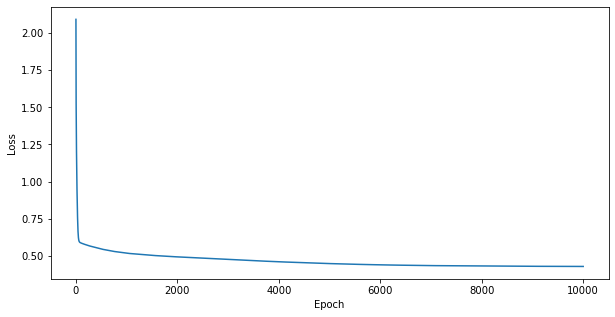

In [7]:
trainModel, losses = train_nn_reg(inputsize, train_data_loader, epochs, lr)

# Predicition on testing dataset

In [8]:
A = test_nn_reg(trainModel, test_data_loader)

the testing RMLE: 0.4843199551105499


/home/naif_alkhunaizi/miniconda3/envs/fd/lib/python3.9/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/naif_alkhunaizi/miniconda3/envs/fd/lib/python3.9/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [31]:
pred_eval = []
for data in np.array(test_set_panda):
    pred_eval.append(float(trainModel.cuda()(torch.tensor(data).reshape(1,76).cuda().float())))
    
header = ["Id", "SalePrice"]
id_num = [i for i in range(1461,2920)]
with open('predictions_nn.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)
    for i in range(len(pred_eval)):
        row = [id_num[i], pred_eval[i]]
        writer.writerow(row)
# when applied in kaggle got a score of 0.24451! 

# XGBoost

In [4]:
train_set_panda = pd.read_csv("train.csv")
test_set_panda = pd.read_csv("test.csv")
# looping through each column name in the data (Training Dataset)
train_set_panda = clean_data(train_set_panda)
test_set_panda = clean_data(test_set_panda)
X_train, X_test, y_train, y_test = abnormal(train_set_panda, test_size, contamination)
inputsize = X_train.shape[1]
print(f"The input size of your data is {inputsize}")

The input size of your data is 76


In [27]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_log_error

# training
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10)
xgb_r.fit(X_train, y_train)

# checking how it fits 
pred_train = xgb_r.predict(X_train)
rmse_train = mean_squared_log_error(y_train, pred_train)
print(f"RMSLE train: {rmse_train}")
pred_test = xgb_r.predict(X_test)
rmse_test = mean_squared_log_error(y_test, pred_test)
print(f"RMSLE test: {rmse_test}")

[01:24:38] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE train: 0.004056376224191507
RMSLE test: 0.027346305549990874


# eval xgboost on competion data

In [46]:
header = ["Id", "SalePrice"]
id_num = [i for i in range(1461,2920)]
with open('predictions.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)
    for i in range(pred_test.shape[0]):
        row = [id_num[i], pred_test[i]]
        writer.writerow(row)
# when applied in kaggle got a score of 0.19696! 

# Comparison NN vs XGBOOST

* We can clearly see in a regression task xgboost is much easier to train and gives better results
